In [1]:
import pandas as pd
import numpy as np
import h5py
from scipy.stats import mode


c:\Users\jakub\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


This script looks at min and max of light values within each composite

In [4]:
# load clean gdp data
gdp = pd.read_csv("data/gdp_ukraine_clean.csv")
nearnad_snow_cov_max, nearnad_snow_cov_min = 0, 1000000
nearnad_snow_free_max, nearnad_snow_free_min = 0, 1000000
offnad_snow_cov_max, offnad_snow_cov_min = 0, 1000000
offnad_snow_free_max, offnad_snow_free_min = 0, 1000000
allangle_snow_cov_max, allangle_snow_cov_min = 0, 1000000
allangle_snow_free_max, allangle_snow_free_min = 0, 1000000

for i in range(len(gdp)):

    # get year, region, and gdp
    year = gdp["year"][i]
    region = gdp["region"][i]
    gdp_value = gdp["real_gdp"][i]

    # get the file name
    file_name = f"{year}_{region}.h5"

    # load the image
    file_path = f"data/annual_region_images/{file_name}"
    
    with h5py.File(file_path, 'r') as annual_region:
        nearnad_snow_cov = annual_region["NearNadir_Composite_Snow_Covered"][:]
        nearnad_snow_free = annual_region["NearNadir_Composite_Snow_Free"][:]
        offnad_snow_cov = annual_region["OffNadir_Composite_Snow_Covered"][:]
        offnad_snow_free = annual_region["OffNadir_Composite_Snow_Free"][:]
        allangle_snow_cov = annual_region["AllAngle_Composite_Snow_Covered"][:]
        allangle_snow_free = annual_region["AllAngle_Composite_Snow_Free"][:]

        # check what the max and min values are within each category
        if nearnad_snow_cov.max() > nearnad_snow_cov_max:
            nearnad_snow_cov_max = nearnad_snow_cov.max()
        if nearnad_snow_cov.min() < nearnad_snow_cov_min:
            nearnad_snow_cov_min = nearnad_snow_cov.min()
        if nearnad_snow_free.max() > nearnad_snow_free_max:
            nearnad_snow_free_max = nearnad_snow_free.max()
        if nearnad_snow_free.min() < nearnad_snow_free_min:
            nearnad_snow_free_min = nearnad_snow_free.min()
        if offnad_snow_cov.max() > offnad_snow_cov_max:
            offnad_snow_cov_max = offnad_snow_cov.max()
        if offnad_snow_cov.min() < offnad_snow_cov_min:
            offnad_snow_cov_min = offnad_snow_cov.min()
        if offnad_snow_free.max() > offnad_snow_free_max:
            offnad_snow_free_max = offnad_snow_free.max()
        if offnad_snow_free.min() < offnad_snow_free_min:
            offnad_snow_free_min = offnad_snow_free.min()
        if allangle_snow_cov.max() > allangle_snow_cov_max:
            allangle_snow_cov_max = allangle_snow_cov.max()
        if allangle_snow_cov.min() < allangle_snow_cov_min: 
            allangle_snow_cov_min = allangle_snow_cov.min()
        if allangle_snow_free.max() > allangle_snow_free_max:
            allangle_snow_free_max = allangle_snow_free.max()
        if allangle_snow_free.min() < allangle_snow_free_min:
            allangle_snow_free_min = allangle_snow_free.min()

print(f"NearNadir Composite Snow Covered Max: {nearnad_snow_cov_max}")
print(f"NearNadir Composite Snow Covered Min: {nearnad_snow_cov_min}")
print(f"NearNadir Composite Snow Free Max: {nearnad_snow_free_max}")
print(f"NearNadir Composite Snow Free Min: {nearnad_snow_free_min}")
print(f"OffNadir Composite Snow Covered Max: {offnad_snow_cov_max}")
print(f"OffNadir Composite Snow Covered Min: {offnad_snow_cov_min}")
print(f"OffNadir Composite Snow Free Max: {offnad_snow_free_max}")
print(f"OffNadir Composite Snow Free Min: {offnad_snow_free_min}")
print(f"AllAngle Composite Snow Covered Max: {allangle_snow_cov_max}")
print(f"AllAngle Composite Snow Covered Min: {allangle_snow_cov_min}")
print(f"AllAngle Composite Snow Free Max: {allangle_snow_free_max}")
print(f"AllAngle Composite Snow Free Min: {allangle_snow_free_min}")

# take the log of all the max values
# nearnad_snow_cov_max = np.log(nearnad_snow_cov_max)
# nearnad_snow_free_max = np.log(nearnad_snow_free_max)
# offnad_snow_cov_max = np.log(offnad_snow_cov_max)
# offnad_snow_free_max = np.log(offnad_snow_free_max)
# allangle_snow_cov_max = np.log(allangle_snow_cov_max)
# allangle_snow_free_max = np.log(allangle_snow_free_max)


NearNadir Composite Snow Covered Max: 30000.0
NearNadir Composite Snow Covered Min: 0.0
NearNadir Composite Snow Free Max: 30000.0
NearNadir Composite Snow Free Min: 0.0
OffNadir Composite Snow Covered Max: 30000.0
OffNadir Composite Snow Covered Min: 0.0
OffNadir Composite Snow Free Max: 25135.0
OffNadir Composite Snow Free Min: 0.0
AllAngle Composite Snow Covered Max: 30000.0
AllAngle Composite Snow Covered Min: 0.0
AllAngle Composite Snow Free Max: 23922.0
AllAngle Composite Snow Free Min: 0.0


This script looks calculates the idr and log bins for each composite 

In [24]:
def get_bins(composite_all):

    # exclude zeros
    composite_all = composite_all[composite_all > 0]

    # calculate the interdecile range
    p10 = np.percentile(composite_all, 10)
    p90 = np.percentile(composite_all, 90)
    interdecile_range = p90 - p10

    # calculate the bin width, round to a whole number up
    bin_width = np.ceil(interdecile_range / 8)

    # get the bins
    bins_idr = [0.1 + p10 + i * bin_width for i in range(8)]
    bins_idr = [composite_all.min() - 0.1] + bins_idr + [max(p90, p10 + 8 *bin_width), composite_all.max() + 0.1]

    # turn all values into log
    composite_all_log = np.log(composite_all)

    # get the bins of equal width
    bins_log = np.linspace(composite_all_log.min(), composite_all_log.max(), 11, endpoint=True)

    return bins_idr, bins_log
    

In [25]:
gdp = pd.read_csv("data/gdp_ukraine_clean.csv")
composite_names = ["NearNadir_Composite_Snow_Covered", "NearNadir_Composite_Snow_Free", "OffNadir_Composite_Snow_Covered", "OffNadir_Composite_Snow_Free", "AllAngle_Composite_Snow_Covered", "AllAngle_Composite_Snow_Free"]

for composite_name in composite_names:

    composite_all = np.array([])

    for i in range(len(gdp)):

        # get year, region, and gdp
        year = gdp["year"][i]
        region = gdp["region"][i]
        gdp_value = gdp["real_gdp"][i]

        # get the file name
        file_name = f"{year}_{region}.h5"

        # load the image
        file_path = f"data/annual_region_images/{file_name}"
        
        with h5py.File(file_path, 'r') as annual_region:
            composite = annual_region[composite_name][:].flatten()

        # append the values to the list
        composite_all = np.append(composite_all, composite)

        if i % 50 == 0:
            print(f"{i} out of {len(gdp)} done for {composite_name}.")

    # get the bins for that composite
    bins_idr, bins_log = get_bins(composite_all)

    print(f"Composite: {composite_name}")
    print(f"Bins IDR: {bins_idr}")
    print(f"Bins Log: {bins_log}")

    # save the bins
    with open(f"data/bins/{composite_name}_bins_idr.npy", "wb") as f:
        np.save(f, bins_idr)
    
    with open(f"data/bins/{composite_name}_bins_log.npy", "wb") as f:
        np.save(f, bins_log)


0 out of 250 done for NearNadir_Composite_Snow_Covered.
50 out of 250 done for NearNadir_Composite_Snow_Covered.
100 out of 250 done for NearNadir_Composite_Snow_Covered.
150 out of 250 done for NearNadir_Composite_Snow_Covered.
200 out of 250 done for NearNadir_Composite_Snow_Covered.
Composite: NearNadir_Composite_Snow_Covered
Bins IDR: [4.9, 5.1, 7.1, 9.1, 11.1, 13.1, 15.1, 17.1, 19.1, 21.0, 30891.1]
Bins Log: [ 1.60943791  2.48231614  3.35519436  4.22807259  5.10095081  5.97382904
  6.84670726  7.71958548  8.59246371  9.46534193 10.33822016]
0 out of 250 done for NearNadir_Composite_Snow_Free.
50 out of 250 done for NearNadir_Composite_Snow_Free.
100 out of 250 done for NearNadir_Composite_Snow_Free.
150 out of 250 done for NearNadir_Composite_Snow_Free.
200 out of 250 done for NearNadir_Composite_Snow_Free.
Composite: NearNadir_Composite_Snow_Free
Bins IDR: [4.9, 5.1, 11.1, 17.1, 23.1, 29.1, 35.1, 41.1, 47.1, 53.0, 30000.1]
Bins Log: [ 1.60943791  2.47938939  3.34934086  4.2192923

This script computes tabular data for each composite

In [26]:
def get_tabular_data(composite_name, log_bins, idr_bins, prefix, annual_region, data_dict):

    image = annual_region[composite_name][:].flatten()

    # count the number of zeros, exclude them
    num_zeros = np.sum(image == 0)
    image = image[image != 0]

    # take the sum, mean, median, standard deviation, mode of non-zero values
    sum = np.sum(image)
    mean = np.mean(image)
    median = np.median(image)
    mode_res = mode(image)
    sd = np.std(image)

    # get the counts for the idr bins
    idr_counts, idr_bin_edges = np.histogram(image, bins=idr_bins)

    # take the log and get the counts for the log bins
    log_image = np.log(image)
    log_counts, log_bin_edges = np.histogram(log_image, bins=log_bins)

    # create a dictionary to store the data
    data = data_dict.copy()
    for i in range(1, 11):
        data[f"{prefix}_idr_{i}"] = idr_counts[i - 1]
        data[f"{prefix}_log_{i}"] = log_counts[i - 1]

    data[f"{prefix}_num_zeros"] = num_zeros
    data[f"{prefix}_sum"] = sum
    data[f"{prefix}_mean"] = mean
    data[f"{prefix}_median"] = median
    data[f"{prefix}_sd"] = sd
    data[f"{prefix}_mode"] = mode_res.mode[0]

    return data

In [27]:
gdp = pd.read_csv("data/gdp_ukraine_clean.csv")

composite_names = ["NearNadir_Composite_Snow_Covered", "NearNadir_Composite_Snow_Free", "OffNadir_Composite_Snow_Covered", "OffNadir_Composite_Snow_Free", "AllAngle_Composite_Snow_Covered", "AllAngle_Composite_Snow_Free"]
composite_prefixes = ["nearnad_snow_cov", "nearnad_snow_free", "offnad_snow_cov", "offnad_snow_free", "allangle_snow_cov", "allangle_snow_free"]
bin_types = ["idr", "log"]
other_data = ["num_zeros", "sum", "mean", "median", "sd", "mode"]

# get all column names
column_names = []
for prefix in composite_prefixes:
    for bin_type in bin_types:
        for i in range(1, 11):
            column_names.append(f"{prefix}_{bin_type}_{i}")
    for other in other_data:
        column_names.append(f"{prefix}_{other}")


# initialise a pandas dataframe to store the data
df = pd.DataFrame(columns=["year", "region", "real_gdp"] + column_names)

for i in range(len(gdp)):

    # get year, region, and gdp
    year = gdp["year"][i]
    region = gdp["region"][i]
    gdp_value = gdp["real_gdp"][i]
    data_dict = {"year": year, "region": region, "real_gdp": gdp_value}

    # get the file name
    file_name = f"{year}_{region}.h5"

    # load the image
    file_path = f"data/annual_region_images/{file_name}"
    
    with h5py.File(file_path, 'r') as annual_region:

        for composite_name, prefix in zip(composite_names, composite_prefixes):

            # get the bins
            with open(f"data/bins/{composite_name}_bins_idr.npy", "rb") as f:
                idr_bins = np.load(f)
            with open(f"data/bins/{composite_name}_bins_log.npy", "rb") as f:
                log_bins = np.load(f)

            # get the tabular data for that composite
            data_dict = get_tabular_data(composite_name, log_bins, idr_bins, prefix, annual_region, data_dict)

        # add the data to the dataframe
        new_row = pd.DataFrame([data_dict])
        df = pd.concat([df, new_row], ignore_index=True)

# save the dataframe

# df.to_csv("data/tabular_data_ukraine.csv", index=False)

C:\Users\jakub\AppData\Local\Temp/ipykernel_7368/702442773.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


In [28]:
# delete all zeros, keep only values less than 50
# subset = nearnad_snow_cov_all[nearnad_snow_cov_all > 0]
# subset = subset[subset > 0]

# delete all zeros, take the log of the values      
# subset = [np.log(x) for x in nearnad_snow_cov_all if x > 0]

df.to_csv("data/tabular_data_ukraine.csv", index=False)

df

,year,region,real_gdp,nearnad_snow_cov_idr_1,nearnad_snow_cov_idr_2,nearnad_snow_cov_idr_3,nearnad_snow_cov_idr_4,nearnad_snow_cov_idr_5,nearnad_snow_cov_idr_6,nearnad_snow_cov_idr_7,...,allangle_snow_free_log_7,allangle_snow_free_log_8,allangle_snow_free_log_9,allangle_snow_free_log_10,allangle_snow_free_num_zeros,allangle_snow_free_sum,allangle_snow_free_mean,allangle_snow_free_median,allangle_snow_free_sd,allangle_snow_free_mode
0,2012,Vinnytsia_Oblast,33024.000000,25990,16564,4888,2587,1696,1191,892,...,0,0,0,0,792401,312720.0,10.173395,6.0,20.219772,5.0
1,2013,Vinnytsia_Oblast,34609.152000,12792,9565,3185,1703,1014,657,480,...,0,0,0,0,799435,287881.0,12.144316,6.0,24.641935,5.0
2,2014,Vinnytsia_Oblast,36201.172992,52833,29585,6386,2994,1641,1037,705,...,0,0,0,0,797891,283071.0,11.211177,6.0,23.294181,5.0
3,2015,Vinnytsia_Oblast,35151.338975,19965,30187,8175,2141,1127,600,299,...,0,0,0,0,804403,230866.0,12.321396,6.0,24.631440,5.0
4,2016,Vinnytsia_Oblast,37436.176009,22658,20507,6770,2907,1732,972,645,...,0,0,0,0,806626,228765.0,13.852792,6.0,27.176620,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2017,Kyiv,293283.238440,72,552,433,82,130,211,153,...,8,0,0,0,816747,650925.0,101.818395,50.0,115.142866,7.0
246,2018,Kyiv,304134.718262,147,477,253,20,18,52,70,...,13,0,0,0,816746,697223.0,109.043322,50.0,126.264514,8.0
247,2019,Kyiv,313562.894528,174,437,261,104,83,73,77,...,16,0,0,0,816746,738053.0,115.428996,58.0,130.487357,8.0
248,2020,Kyiv,304156.007693,155,452,291,168,261,212,141,...,1,0,0,0,816748,716812.0,112.142053,52.0,126.220223,8.0


In [53]:
# calculate the interdecile range
p10, p90 = np.percentile(subset, 10), np.percentile(subset, 90)
idr = p90 - p10

print(f"10th Percentile: {p10}")
print(f"90th Percentile: {p90}")
print(f"Interdecile Range: {idr}")

# create 10 bins for the data using interdecile range: from 0 each bin higher by 15
indices_idr = [1, 15, 30, 45, 60, 75, 90, 105, 120, 135, subset.max()]

print(indices_idr)

10th Percentile: 5.0
90th Percentile: 20.0
Interdecile Range: 15.0
[1, 15, 30, 45, 60, 75, 90, 105, 120, 135, 30891.0]


In [32]:
# get bins using k means clustering
from sklearn.cluster import KMeans

subset = np.array(subset)

subset = subset.reshape(-1, 1)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(subset)

# get the bin edges
bin_edges = np.sort(kmeans.cluster_centers_.flatten())
print(bin_edges)



[1.60943791 1.79175947 1.99397879 2.26685621 2.65342244 3.26041845
 3.85433042 4.50105963 5.32854576 6.58477254]


In [54]:
# get the bins for the histogram
subset = nearnad_snow_cov_all[nearnad_snow_cov_all > 0]
subset = np.log(subset)
subset = np.sort(subset)
num_bins = 10

# equal number of observations in each bin
indices_count = np.linspace(0, len(subset) - 1, num_bins + 1, endpoint=True).astype(int)

# extract the cutoff points
indices_count = subset[indices_count]


print(indices_count)

# equal width bins
indices_width = np.linspace(subset.min(), subset.max(), num_bins + 1, endpoint=True)

print(indices_width)



[ 1.60943791  1.60943791  1.60943791  1.60943791  1.79175947  1.79175947
  1.94591015  2.07944154  2.30258509  2.99573227 10.33822016]
[ 1.60943791  2.48231614  3.35519436  4.22807259  5.10095081  5.97382904
  6.84670726  7.71958548  8.59246371  9.46534193 10.33822016]


In [55]:
# get the histogram
custom_bins = indices_width

counts, bin_edges = np.histogram(subset, bins=custom_bins)

print(counts)
print(bin_edges)

counts, bin_edges = np.histogram(nearnad_snow_cov_all, bins=indices_idr)

print(counts)
print(bin_edges)

[10987685  1167732   595700   266191    97051    48292    12150     1052
      412      264]
[ 1.60943791  2.48231614  3.35519436  4.22807259  5.10095081  5.97382904
  6.84670726  7.71958548  8.59246371  9.46534193 10.33822016]
[11509701   673465   312242   183917   109903    71265    50135    37171
    28738   199992]
[1.0000e+00 1.5000e+01 3.0000e+01 4.5000e+01 6.0000e+01 7.5000e+01
 9.0000e+01 1.0500e+02 1.2000e+02 1.3500e+02 3.0891e+04]


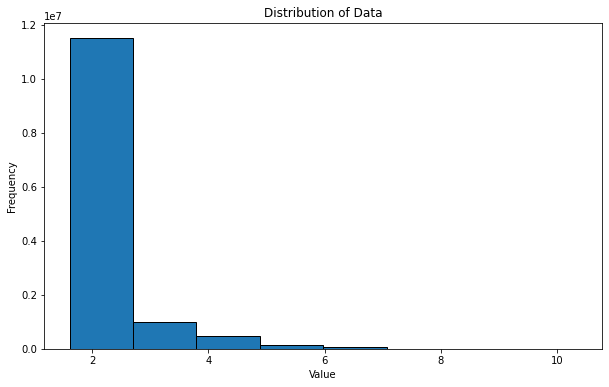

In [40]:
# plot the histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(subset, bins = custom_bins, edgecolor='black')
plt.title('Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


# plt.hist(nearnad_snow_cov_all, label='NearNadir Composite Snow Covered')
# plt.hist(nearnad_snow_free_all, bins=100, alpha=0.5, label='NearNadir Composite Snow Free')
# plt.hist(offnad_snow_cov_all, bins=100, alpha=0.5, label='OffNadir Composite Snow Covered')
# plt.hist(offnad_snow_free_all, bins=100, alpha=0.5, label='OffNadir Composite Snow Free')
# plt.hist(allangle_snow_cov_all, bins=100, alpha=0.5, label='AllAngle Composite Snow Covered')
# plt.hist(allangle_snow_free_all, bins=100, alpha=0.5, label='AllAngle Composite Snow Free')


In [14]:
def get_tabular_data(composite_name, log_bins, idr_bins, prefix, annual_region, data_dict):

    image = annual_region[composite_name][:].flatten()

    # count the number of zeros, exclude them
    num_zeros = np.sum(image == 0)
    image = image[image != 0]

    # take the sum, mean, median, standard deviation, mode of non-zero values
    sum = np.sum(image)
    mean = np.mean(image)
    median = np.median(image)
    mode_res = mode(image)
    sd = np.std(image)

    # get the counts for the idr bins
    idr_counts, idr_bin_edges = np.histogram(image, bins=idr_bins)

    # take the log and get the counts for the log bins
    log_image = np.log(image)
    log_counts, log_bin_edges = np.histogram(log_image, bins=log_bins)

    # create a dictionary to store the data
    data = data_dict.copy()
    for i in range(1, 11):
        data[f"{prefix}_idr_{i}"] = idr_counts[i - 1]
        data[f"{prefix}_log_{i}"] = log_counts[i - 1]

    data[f"{prefix}_num_zeros"] = num_zeros
    data[f"{prefix}_sum"] = sum
    data[f"{prefix}_mean"] = mean
    data[f"{prefix}_median"] = median
    data[f"{prefix}_sd"] = sd
    data[f"{prefix}_mode"] = mode_res.mode[0]

    return data
    
def get_simple_characteristics(composite_name, annual_region, prefix, data_dict):

    image = annual_region[composite_name][:].flatten()

    # exclude all observations equal to zero
    image = [i != 0 for i in image]

    # take the sum, mean, median, standard deviation, mode of non-zero values
    sum = np.sum(image)
    mean = np.mean(image)
    median = np.median(image)
    # mode = np.mode(image)
    sd = np.std(image)

    for var, var_name in zip([sum, mean, median, sd], ["sum", "mean", "median", "sd"]):
        data_dict[f"{prefix}_{var_name}"] = var

    return data_dict 
    



In [3]:
gdp = pd.read_csv("data/gdp_ukraine_clean.csv")


# initialise a pandas dataframe to store the data
df = pd.DataFrame(columns=["year", "region", "gdp", 
                           "nearnad_snow_cov_1", "nearnad_snow_cov_2", "nearnad_snow_cov_3", "nearnad_snow_cov_4", "nearnad_snow_cov_5", "nearnad_snow_cov_6", "nearnad_snow_cov_7", "nearnad_snow_cov_8", "nearnad_snow_cov_9", "nearnad_snow_cov_10",
                           "nearnad_snow_free_1", "nearnad_snow_free_2", "nearnad_snow_free_3", "nearnad_snow_free_4", "nearnad_snow_free_5", "nearnad_snow_free_6", "nearnad_snow_free_7", "nearnad_snow_free_8", "nearnad_snow_free_9", "nearnad_snow_free_10",
                           "offnad_snow_cov_1", "offnad_snow_cov_2", "offnad_snow_cov_3", "offnad_snow_cov_4", "offnad_snow_cov_5", "offnad_snow_cov_6", "offnad_snow_cov_7", "offnad_snow_cov_8", "offnad_snow_cov_9", "offnad_snow_cov_10",
                           "offnad_snow_free_1", "offnad_snow_free_2", "offnad_snow_free_3", "offnad_snow_free_4", "offnad_snow_free_5", "offnad_snow_free_6", "offnad_snow_free_7", "offnad_snow_free_8", "offnad_snow_free_9", "offnad_snow_free_10", 
                           "allangle_snow_cov_1", "allangle_snow_cov_2", "allangle_snow_cov_3", "allangle_snow_cov_4", "allangle_snow_cov_5", "allangle_snow_cov_6", "allangle_snow_cov_7", "allangle_snow_cov_8", "allangle_snow_cov_9", "allangle_snow_cov_10", 
                           "allangle_snow_free_1", "allangle_snow_free_2", "allangle_snow_free_3", "allangle_snow_free_4", "allangle_snow_free_5", "allangle_snow_free_6", "allangle_snow_free_7", "allangle_snow_free_8", "allangle_snow_free_9", "allangle_snow_free_10"])

for i in range(len(gdp)):

    # get year, region, and gdp
    year = gdp["year"][i]
    region = gdp["region"][i]
    gdp_value = gdp["real_gdp"][i]
    data_dict = {"year": year, "region": region, "gdp": gdp_value}

    # get the file name
    file_name = f"{year}_{region}.h5"

    # load the image
    file_path = f"data/annual_region_images/{file_name}"
    
    with h5py.File(file_path, 'r') as annual_region:

        data_dict = get_tabular_data("NearNadir_Composite_Snow_Covered", nearnad_snow_cov_max, "nearnad_snow_cov", annual_region, data_dict)
        data_dict = get_tabular_data("NearNadir_Composite_Snow_Free", nearnad_snow_free_max, "nearnad_snow_free", annual_region, data_dict)
        data_dict = get_tabular_data("OffNadir_Composite_Snow_Covered", offnad_snow_cov_max, "offnad_snow_cov", annual_region, data_dict)
        data_dict = get_tabular_data("OffNadir_Composite_Snow_Free", offnad_snow_free_max, "offnad_snow_free", annual_region, data_dict)
        data_dict = get_tabular_data("AllAngle_Composite_Snow_Covered", allangle_snow_cov_max, "allangle_snow_cov", annual_region, data_dict)
        data_dict = get_tabular_data("AllAngle_Composite_Snow_Free", allangle_snow_free_max, "allangle_snow_free", annual_region, data_dict)

        # add the data to the dataframe
        new_row = pd.DataFrame([data_dict])
        df = pd.concat([df, new_row], ignore_index=True)

# save the dataframe

# df.to_csv("data/tabular_data_ukraine.csv", index=False)

NameError: name 'gdp' is not defined

In [16]:
gdp = pd.read_csv("data/clean_ukr_gdp.csv")
df = pd.DataFrame(columns=["year", "region", "gdp", 
                           "nearnad_snow_cov_sum", "nearnad_snow_cov_mean", "nearnad_snow_cov_median",  "nearnad_snow_cov_sd",
                           "nearnad_snow_free_sum", "nearnad_snow_free_mean", "nearnad_snow_free_median", "nearnad_snow_free_sd",
                           "offnad_snow_cov_sum", "offnad_snow_cov_mean", "offnad_snow_cov_median", "offnad_snow_cov_sd", 
                           "offnad_snow_free_sum", "offnad_snow_free_mean", "offnad_snow_free_median", "offnad_snow_free_sd",  
                           "allangle_snow_cov_sum", "allangle_snow_cov_mean", "allangle_snow_cov_median", "allangle_snow_cov_sd", 
                           "allangle_snow_free_sum", "allangle_snow_free_mean", "allangle_snow_free_median", "allangle_snow_free_sd"])


for i in range(len(gdp)):

    # get year, region, and gdp
    year = gdp["year"][i]
    region = gdp["region"][i]
    gdp_value = gdp["real_gdp"][i]
    data_dict = {"year": year, "region": region, "gdp": gdp_value}

    # get the file name
    file_name = f"{year}_{region}_hq.h5"

    # load the image
    file_path = f"data/annual_region_images/{file_name}"
    
    with h5py.File(file_path, 'r') as annual_region:

        data_dict = get_simple_characteristics("NearNadir_Composite_Snow_Covered", annual_region, "nearnad_snow_cov", data_dict)
        data_dict = get_simple_characteristics("NearNadir_Composite_Snow_Free", annual_region, "nearnad_snow_free", data_dict)
        data_dict = get_simple_characteristics("OffNadir_Composite_Snow_Covered", annual_region, "offnad_snow_cov", data_dict)
        data_dict = get_simple_characteristics("OffNadir_Composite_Snow_Free", annual_region, "offnad_snow_free", data_dict)
        data_dict = get_simple_characteristics("AllAngle_Composite_Snow_Covered", annual_region, "allangle_snow_cov", data_dict)
        data_dict = get_simple_characteristics("AllAngle_Composite_Snow_Free", annual_region, "allangle_snow_free", data_dict)

        # add the data to the dataframe
        new_row = pd.DataFrame([data_dict])
        df = pd.concat([df, new_row], ignore_index=True)


C:\Users\jakub\AppData\Local\Temp/ipykernel_1320/1907219802.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


KeyboardInterrupt: 

In [12]:
df.to_csv("data/tabular_data_ukraine.csv", index=False)
